# ------------------------------------------------------------------------
Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
Distributed under the (new) BSD License. See LICENSE.txt for more info.
# ------------------------------------------------------------------------
exercice_12

# Animation
For quite a long time, animation in matplotlib was not an easy task and was done mainly through clever hacks. However, things have started to change since version 1.1 and the introduction of tools for creating animation very intuitively, with the possibility to save them in all kind of formats (but don't expect to be able to run very complex animations at 60 fps though).

The most easy way to make an animation in matplotlib is to declare a FuncAnimation object that specifies to matplotlib what is the figure to update, what is the update function and what is the delay between frames.

# Drip drop
A very simple rain effect can be obtained by having small growing rings randomly positioned over a figure. Of course, they won't grow forever since the wave is supposed to damp with time. To simulate that, we can use a more and more transparent color as the ring is growing, up to the point where it is no more visible. At this point, we remove the ring and create a new one.

First step is to create a blank figure:

```python
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')
# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
```
Next, we need to create several rings. For this, we can use the scatter plot object that is generally used to visualize points cloud, but we can also use it to draw rings by specifying we don't have a facecolor. We also have to take care of initial size and color for each ring such that we have all sizes between a minimum and a maximum size. In addition, we need to make sure the largest ring is almost transparent.

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

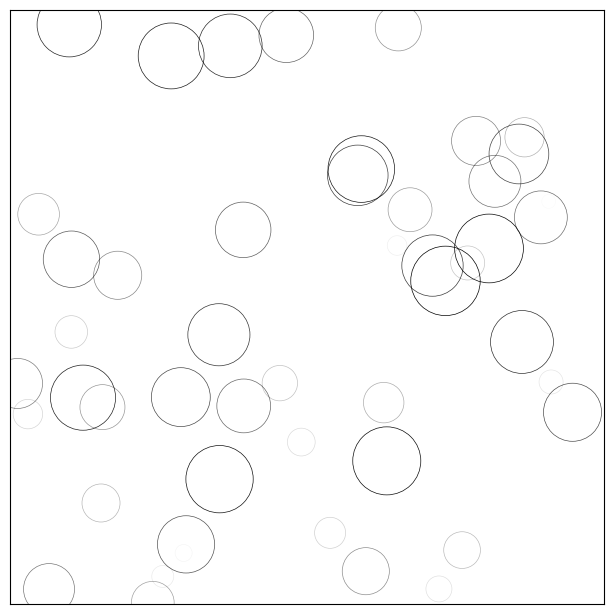

In [3]:
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
ax = fig.add_axes([0.005,0.005,.99,.99], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

plt.show()


Now, we need to write the update function for our animation. We know that at each time step each ring should grow and become more transparent while the largest ring should be totally transparent and thus removed. Of course, we won't actually remove the largest ring but re-use it to set a new ring at a new random position, with nominal size and color. Hence, we keep the number of rings constant.

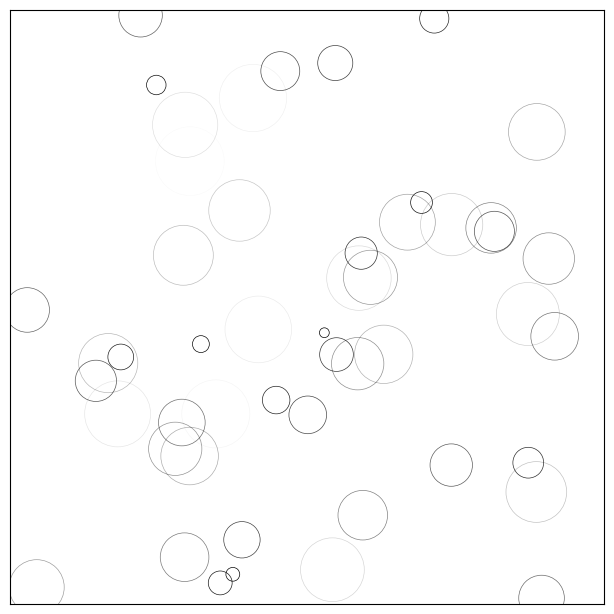

In [15]:
# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

# animation = FuncAnimation(fig, update, interval=10)
# plt.show()

animation = FuncAnimation(fig, update, interval=10, blit=True, frames=200)
# animation.save('rain.gif', writer='imagemagick', fps=30, dpi=40)
# plt.show()

HTML(animation.to_html5_video())

# some changes

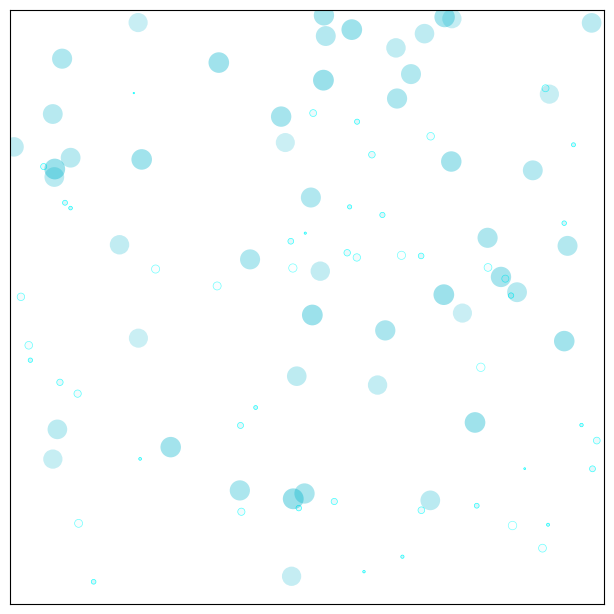

In [31]:
# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 100
size_min = 1
size_max = 75
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,1,1,1)

# Ring-Facecolors
RFC = np.ones((n,4)) * (0,0.7,0.8,0.9)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)
RFC[:,3] = np.linspace(0,0.4,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors= RFC)

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

# animation = FuncAnimation(fig, update, interval=10)
# plt.show()

animation = FuncAnimation(fig, update, interval=10, blit=True, frames=200)
# animation.save('rain.gif', writer='imagemagick', fps=30, dpi=40)
# plt.show()

HTML(animation.to_html5_video())